In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [16]:
df = pd.read_excel('https://raw.githubusercontent.com/hiephamk/Data_Group_Project/main/WorkPlaceSatisfactionSurveyData.xlsx')

# 5. Analyzing Two Variables (Two Categorical Variables)
* Crosstab to explore relationships between two variables.
  - Example: pd.crosstab(df['education'], df['gender'], normalize='columns') * 100
  - Visualize with bar charts if necessary.
* Carefully review the results—only make cautious, observational statements.
* Perform a Chi-Square test & Review the results for 'field name 1' & 'field name 2' dependency**

In [17]:
df['gender']=df['gender'].replace({1:'woman',2:'man'})
df['education']=df['education'].replace({1:'primary school',2:'secondary school graduate',3:'bachelor level', 4:'master level'})

In [18]:
df_5 = df[['gender', 'education']]
df_5.head()

,gender,education
0,woman,primary school
1,woman,secondary school graduate
2,woman,primary school
3,woman,primary school
4,woman,secondary school graduate


In [19]:
#Change values of columns gender and education
df['gender']=df['gender'].replace({1:'woman',2:'man'})
df['education']=df['education'].replace({1:'primary school',2:'secondary school graduate',3:'bachelor level', 4:'master level'})

In [20]:
#set ordinal order for education levels
ordinal_order = ['primary school', 'secondary school graduate','bachelor level', 'master level']
df['education'] = df['education'].astype(pd.CategoricalDtype(categories=ordinal_order, ordered=True))

In [21]:
df_5_1 = pd.crosstab(df['education'], df['gender'], normalize='columns') * 100
df_5_1

gender,man,woman
education,,
primary school,26.315789,35.483871
secondary school graduate,36.842105,37.096774
bachelor level,36.842105,24.193548
master level,0.000000,3.225806


In [22]:
#change values of crosstab to a dataframe to visualize
df_5_2 = df_5_1.reset_index()
df_5_2

gender,education,man,woman
0,primary school,26.315789,35.483871
1,secondary school graduate,36.842105,37.096774
2,bachelor level,36.842105,24.193548
3,master level,0.000000,3.225806


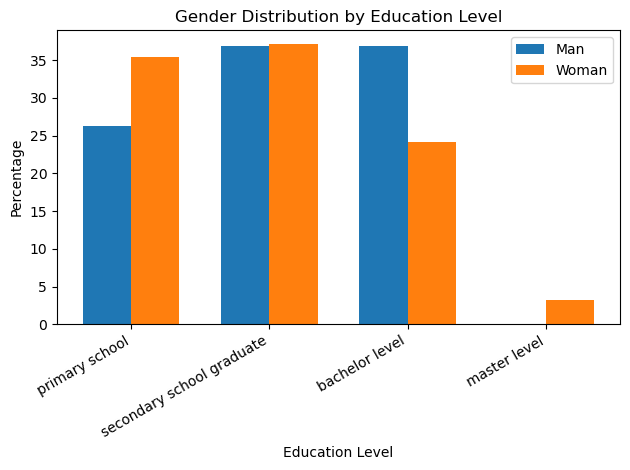

In [23]:
# Plotting
bar_width = 0.35
index = np.arange(len(df_5_2['education']))

fig, ax = plt.subplots()

# Creating bars for 'man' and 'woman'
bars1 = ax.bar(index, df_5_2['man'], bar_width, label='Man')
bars2 = ax.bar(index + bar_width, df_5_2['woman'], bar_width, label='Woman')

# Adding labels, title, and formatting
ax.set_xlabel('Education Level')
ax.set_ylabel('Percentage')
ax.set_title('Gender Distribution by Education Level')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df_5_2['education'], rotation=30, ha='right')
ax.legend()

# Show plot
plt.tight_layout()
plt.show()